# Assignment 5 & 6: Charts
#### Joshua Greenert
#### DSC640-T301 Data Presentation and Visualization
#### 1/12/2023

In [28]:
# Import the required libaries for plotting.
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Set the dataframe and confirm the records are present.
df_expenditures = pd.read_csv('expenditures.txt', sep='\t')

df_expenditures.head(5)

,year,category,expenditure,sex
0,2008,Food,6443,1
1,2008,Alcoholic Beverages,444,1
2,2008,Housing,17109,1
3,2008,Apparel,1801,1
4,2008,Transportation,8604,1


In [29]:
# Group the items by category for the tree map.
df_grouped = df_expenditures.groupby("category").sum()
df_grouped.shape

(14, 3)

## Python Tree Map

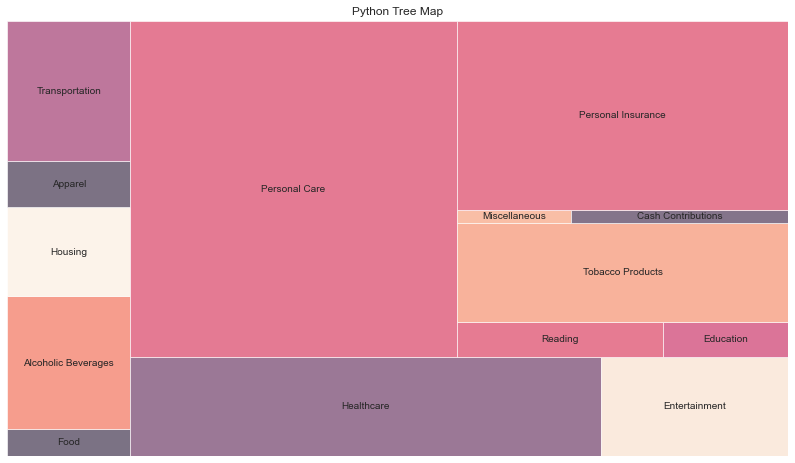

In [30]:
import squarify

# Set the style for seaborn.
sns.set_style(style="whitegrid")

# Set the sizes and labels.
sizes = df_grouped["expenditure"]
label = df_expenditures["category"].unique()

# Plot the data.
fig, axes = plt.subplots(1, 1, figsize=(14, 8))
squarify.plot(sizes=sizes, label=label, alpha=0.6).set(title='Python Tree Map')
plt.axis('off')
plt.show()

## Python Area Chart

In [31]:
# Set a new dataframe from the alt dataset.
df_unemployment = pd.read_csv('unemployement-rate-1948-2010.csv')

# Show the head of the data.
df_unemployment.head(5)

,Series id,Year,Period,Value
0,LNS14000000,1948,M01,3.4
1,LNS14000000,1948,M02,3.8
2,LNS14000000,1948,M03,4.0
3,LNS14000000,1948,M04,3.9
4,LNS14000000,1948,M05,3.5


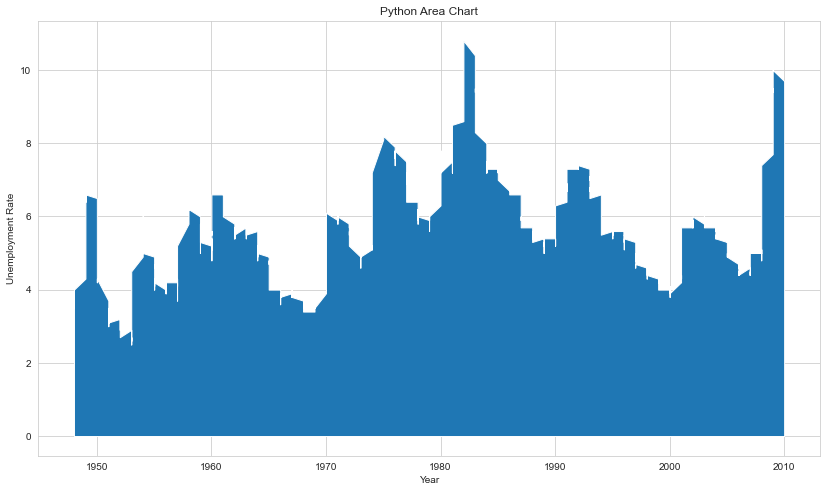

In [37]:
# Set the data.
x = df_unemployment['Year']
y = df_unemployment['Value']

# Create the plot
fig, axes = plt.subplots(1, 1, figsize=(14, 8))
plt.title('Python Area Chart')
plt.xlabel('Year')
plt.ylabel('Unemployment Rate')
plt.fill_between(x, y)
plt.show()

## Python Stacked Area Chart

In [50]:
# Group the data to prepare it for the stacked area chart.
df_grouped = df_expenditures.groupby(["year", "category"], as_index=False).sum()
df_grouped.columns

Index(['year', 'category', 'expenditure', 'sex'], dtype='object')

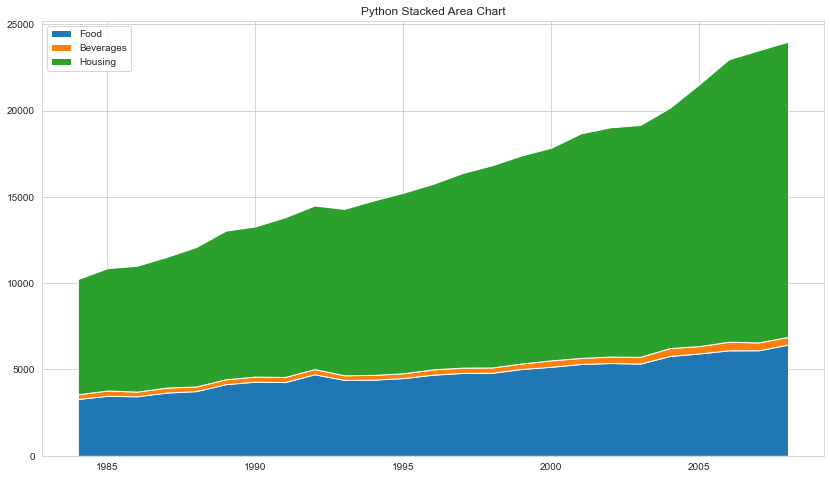

In [52]:
# Use the expenditures dataset for stacked area
years = df_grouped["year"].unique()
food = df_grouped[df_grouped["category"] == "Food"]["expenditure"]
beverages = df_grouped[df_grouped["category"] == "Alcoholic Beverages"]["expenditure"]
housing = df_grouped[df_grouped["category"] == "Housing"]["expenditure"]

# Plot the data
fig, axes = plt.subplots(1, 1, figsize=(14, 8))
plt.title('Python Stacked Area Chart')
plt.stackplot(years,food, beverages, housing, labels=['Food','Beverages','Housing'])
plt.legend(loc='upper left')